In [1]:
import amsterdamumcdb
import random
import pandas as pd
import pandas as pd
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 100)
df = amsterdamumcdb.get_dictionary()

In [2]:
df_drug = pd.read_csv("../../raw/AmsterdamUMCdb-v1/drugitems.csv", encoding='ISO-8859-1')
df_drug.head(1)

,admissionid,orderid,ordercategoryid,ordercategory,itemid,item,isadditive,isconditional,rate,rateunit,rateunitid,ratetimeunitid,doserateperkg,dose,doseunit,doserateunit,doseunitid,doserateunitid,administered,administeredunit,administeredunitid,action,start,stop,duration,solutionitemid,solutionitem,solutionadministered,solutionadministeredunit,fluidin,iscontinuous
0,0,1994485,15,Injecties Antimicrobiele middelen,9152,Cefazoline (Kefzol),0,0,0.0,NaN,NaN,NaN,0,1.0,g,NaN,9,NaN,1.0,g,9,Nieuwe toediening,20100000,20160000,1,8987.0,"NaCl 0,9% Medicatie",0.0,ml,0.0,0


- 7244 Furosemide (Lasix)
- 6882 Bumetanide (Burinex)
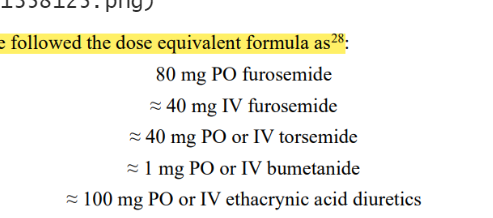

In [3]:
df_diu = df_drug[df_drug["itemid"].isin([7244, 6882])]
df_diu = df_diu[['admissionid','ordercategory','item','start','stop','rate','duration',"rateunit", 'administered','administeredunit']]
df_diu["start"] = df_diu["start"]/1000/60 # min
df_diu["stop"] = df_diu["stop"]/1000/60 # min
df_diu = df_diu.rename(columns={"admissionid":"stay_id",'start':'starttime','stop':'endtime','item':'drug'})
df_diu.head()

,stay_id,ordercategory,drug,starttime,endtime,rate,duration,rateunit,administered,administeredunit
202,4,Injecties Circulatie/Diuretica,Furosemide (Lasix),2212.0,2213.0,0.0,1,NaN,20.0,mg
304,5,Injecties Circulatie/Diuretica,Furosemide (Lasix),2570.0,2571.0,0.0,1,NaN,20.0,mg
553,8,Injecties Circulatie/Diuretica,Furosemide (Lasix),523.0,524.0,0.0,1,NaN,20.0,mg
600,9,Injecties Circulatie/Diuretica,Furosemide (Lasix),1225.0,1226.0,0.0,1,NaN,20.0,mg
601,9,Injecties Circulatie/Diuretica,Furosemide (Lasix),1839.0,1840.0,0.0,1,NaN,20.0,mg


In [4]:
df_diu.to_csv("AUMCdb_diuretics.csv",index=False)

In [5]:
pwd

'/public/hanl/jupyter_dir/database/AMUCdb/clean/medication'